In [40]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
file_path = '/content/sample_data/household_power_consumption.txt'

df = pd.read_csv(file_path, delimiter=';', parse_dates={'Datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values='?', low_memory=False)


<ipython-input-2-71d8f8c2cabc>:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(file_path, delimiter=';', parse_dates={'Datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values='?', low_memory=False)
<ipython-input-2-71d8f8c2cabc>:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(file_path, delimiter=';', parse_dates={'Datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values='?', low_memory=False)


In [3]:
print(df.head())

             Datetime  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


In [5]:
print(df.isnull().sum())

Datetime                    0
Global_active_power      3947
Global_reactive_power    3947
Voltage                  3947
Global_intensity         3948
Sub_metering_1           3948
Sub_metering_2           3948
Sub_metering_3           3948
dtype: int64


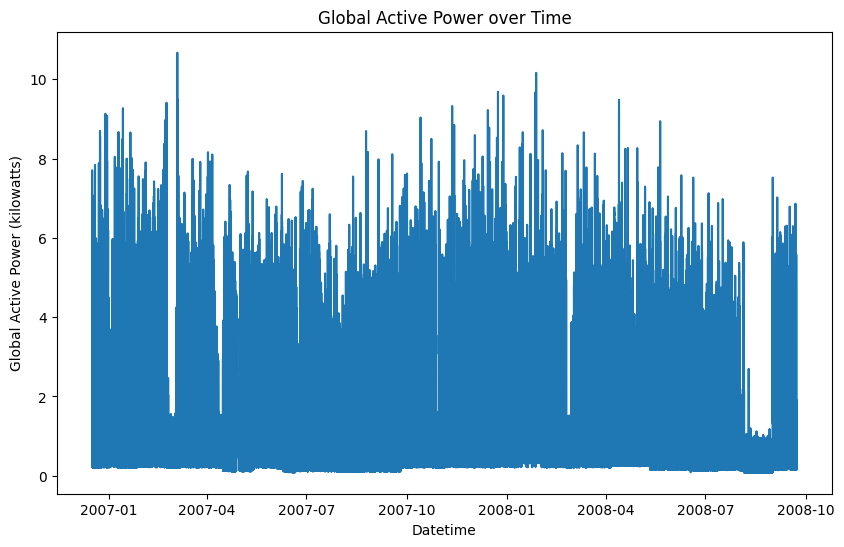

In [6]:
import matplotlib.pyplot as plt

df['Datetime'] = pd.to_datetime(df['Datetime'])

df.set_index('Datetime', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df['Global_active_power'])
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kilowatts)')
plt.title('Global Active Power over Time')
plt.show()

            Global_active_power  Global_reactive_power    Voltage  \
Datetime                                                            
2006-12-16             1209.176                 34.922   93552.53   
2006-12-17             3390.460                226.006  345725.32   
2006-12-18             2203.826                161.792  347373.64   
2006-12-19             1666.194                150.942  348479.01   
2006-12-20             2225.748                160.998  348923.61   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
Datetime                                                                      
2006-12-16            5180.8             0.0           546.0          4926.0  
2006-12-17           14398.6          2033.0          4187.0         13341.0  
2006-12-18            9247.2          1063.0          2621.0         14018.0  
2006-12-19            7094.0           839.0          7602.0          6197.0  
2006-12-20            9313.0             0

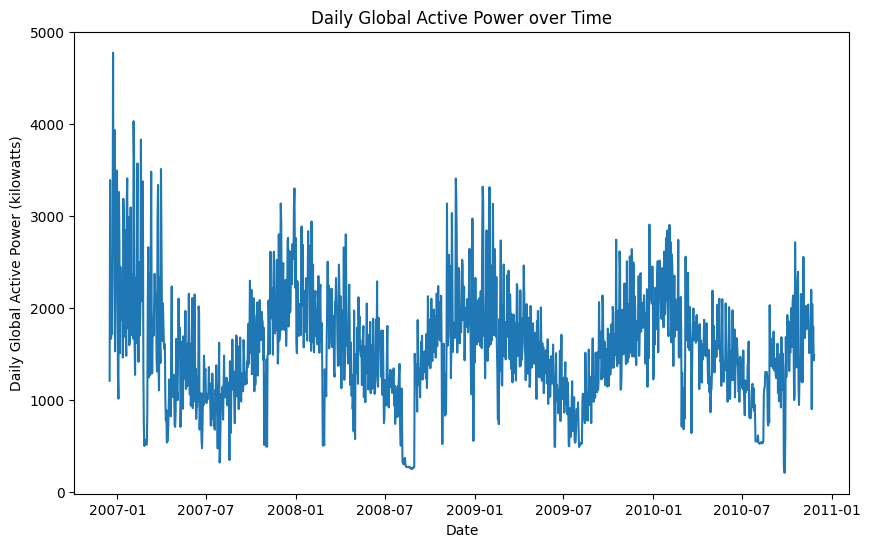

In [48]:
daily_df = df.resample('D').sum()

print(daily_df.head())

plt.figure(figsize=(10, 6))
plt.plot(daily_df['Global_active_power'])
plt.xlabel('Date')
plt.ylabel('Daily Global Active Power (kilowatts)')
plt.title('Daily Global Active Power over Time')
plt.show()

In [52]:
daily_df.reset_index(inplace=True)
daily_df.rename(columns={'Datetime': 'ds', 'Global_active_power': 'y'}, inplace=True)

In [53]:
print(daily_df.isnull().sum())

ds                       0
y                        0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [14]:
!pip install prophet

In [15]:
from prophet import Prophet

In [54]:
daily_df

,ds,y,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...,...
1437,2010-11-22,2041.536,142.354,345883.85,8660.4,4855.0,2110.0,10136.0
1438,2010-11-23,1577.536,137.450,346428.76,6731.2,1871.0,458.0,7611.0
1439,2010-11-24,1796.248,132.460,345644.59,7559.4,1096.0,2848.0,12224.0
1440,2010-11-25,1431.164,116.128,347812.21,6004.0,1076.0,426.0,5072.0


Training set:
          ds         y  Global_reactive_power    Voltage  Global_intensity  \
0 2006-12-16  1209.176                 34.922   93552.53            5180.8   
1 2006-12-17  3390.460                226.006  345725.32           14398.6   
2 2006-12-18  2203.826                161.792  347373.64            9247.2   
3 2006-12-19  1666.194                150.942  348479.01            7094.0   
4 2006-12-20  2225.748                160.998  348923.61            9313.0   

   Sub_metering_1  Sub_metering_2  Sub_metering_3  
0             0.0           546.0          4926.0  
1          2033.0          4187.0         13341.0  
2          1063.0          2621.0         14018.0  
3           839.0          7602.0          6197.0  
4             0.0          2648.0         14063.0  

Test set:
             ds         y  Global_reactive_power    Voltage  Global_intensity  \
1142 2010-01-31  1799.196                171.516  350499.80            7491.2   
1143 2010-02-01  1693.778       

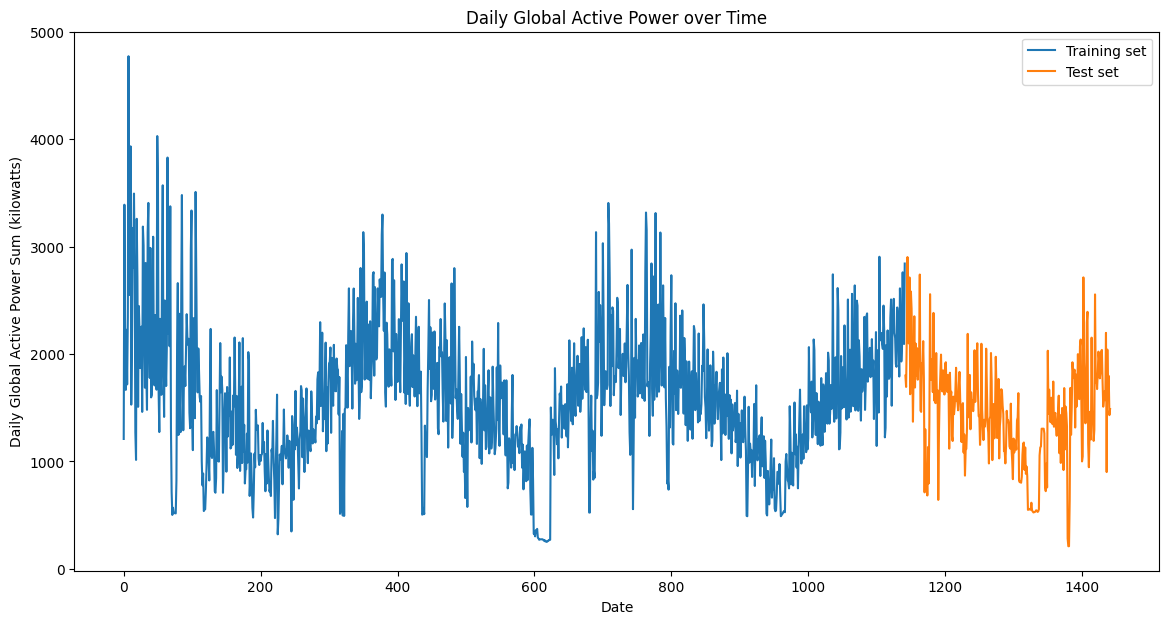

In [55]:
daily_sum_df = daily_df

x = len(daily_sum_df)

daily_sum_df.rename(columns={'Datetime': 'ds', 'Global_active_power': 'y'}, inplace=True)

train_df = daily_sum_df.iloc[:x-300]
test_df = daily_sum_df.iloc[x-300:]

# Display the first few rows of the training and test sets
print("Training set:")
print(train_df.head())
print("\nTest set:")
print(test_df.head())

# Plot the training and test sets
plt.figure(figsize=(14, 7))
plt.plot(train_df['y'], label='Training set')
plt.plot(test_df['y'], label='Test set')
plt.xlabel('Date')
plt.ylabel('Daily Global Active Power Sum (kilowatts)')
plt.title('Daily Global Active Power over Time')
plt.legend()
plt.show()

In [56]:
print(test_df.head())

             ds         y  Global_reactive_power    Voltage  Global_intensity  \
1142 2010-01-31  1799.196                171.516  350499.80            7491.2   
1143 2010-02-01  1693.778                124.784  350829.71            6995.2   
1144 2010-02-02  2157.432                131.168  350399.26            8853.6   
1145 2010-02-03  2903.014                183.692  349038.83           12052.8   
1146 2010-02-04  2316.270                141.848  348625.14            9567.2   

      Sub_metering_1  Sub_metering_2  Sub_metering_3  
1142          1715.0          1380.0         12569.0  
1143          1111.0           367.0         14623.0  
1144             0.0           382.0         21536.0  
1145          2234.0          8423.0         21130.0  
1146          1074.0           532.0         23743.0  


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprvwljmjn/thg6y7j5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprvwljmjn/a_6gu4x8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73863', 'data', 'file=/tmp/tmprvwljmjn/thg6y7j5.json', 'init=/tmp/tmprvwljmjn/a_6gu4x8.json', 'output', 'file=/tmp/tmprvwljmjn/prophet_modelkbj_jvc0/prophet_model-20240618174722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:47:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:47:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


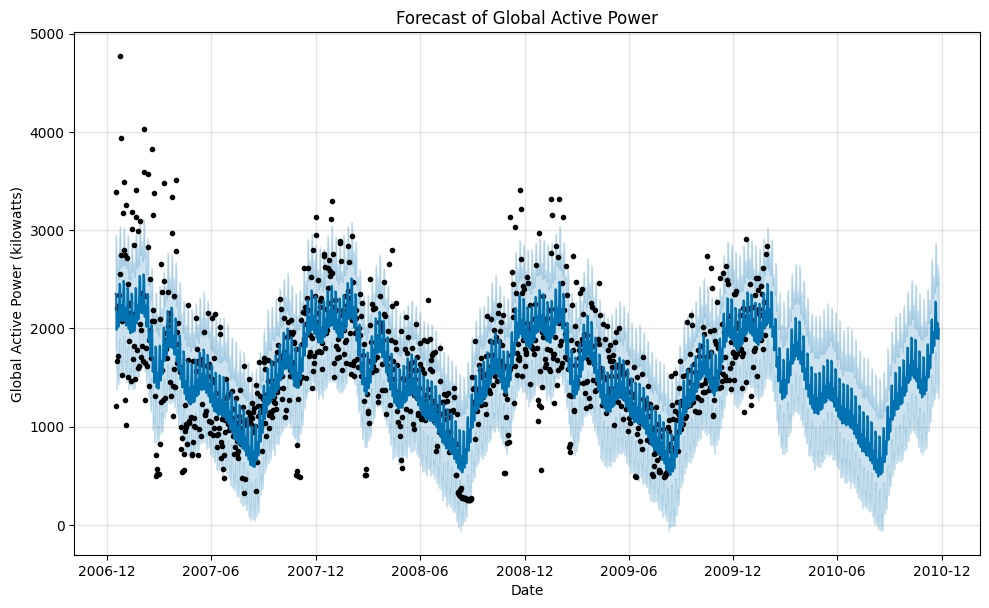

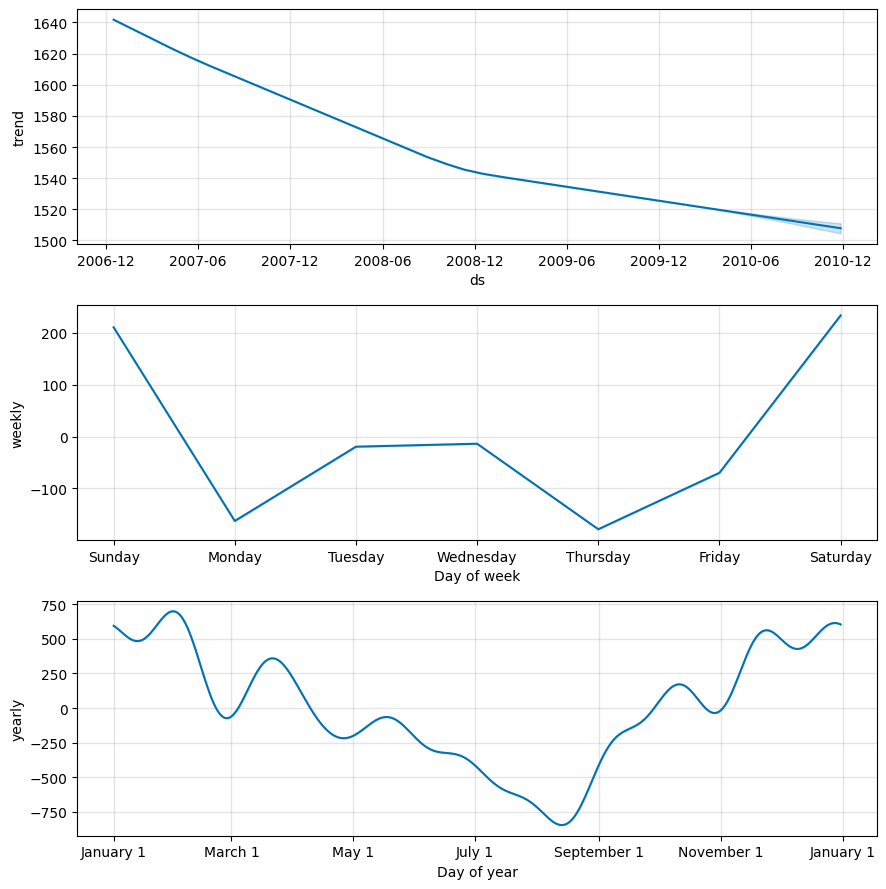

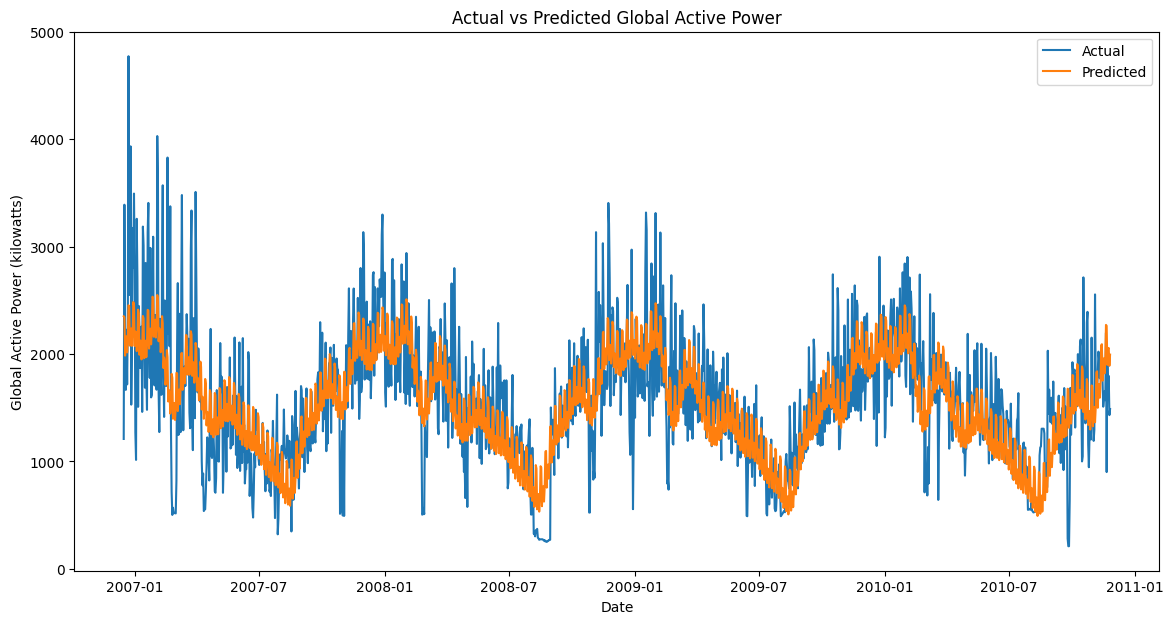

In [57]:
model = Prophet()

model.fit(train_df)

future = model.make_future_dataframe(periods=300)

forecast = model.predict(future)

fig = model.plot(forecast)
plt.title('Forecast of Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(daily_sum_df['ds'], daily_sum_df['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.title('Actual vs Predicted Global Active Power')
plt.legend()
plt.show()

In [64]:
from sklearn.metrics import mean_absolute_percentage_error
predicted_test = forecast.iloc[-300:]['yhat'].values
actual_test = test_df['y'].values

# Calculate the MAPE
mape = mean_absolute_percentage_error(actual_test, predicted_test) * 100

In [65]:
rmse = np.sqrt(mean_squared_error(actual_test, predicted_test))

In [66]:
rmse

725.3392095416158

In [67]:
mape

69.58527881015311

In [68]:
daily_sum_df_2 = daily_sum_df

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprvwljmjn/vl9x9_y8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprvwljmjn/j277y9tj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2877', 'data', 'file=/tmp/tmprvwljmjn/vl9x9_y8.json', 'init=/tmp/tmprvwljmjn/j277y9tj.json', 'output', 'file=/tmp/tmprvwljmjn/prophet_modelii814t_8/prophet_model-20240618175312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:53:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:53:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


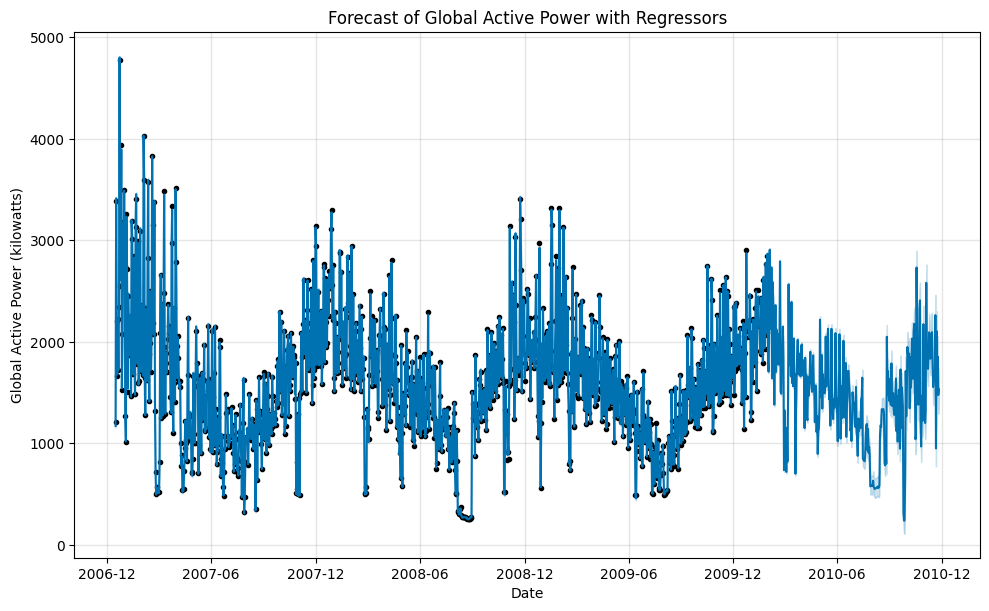

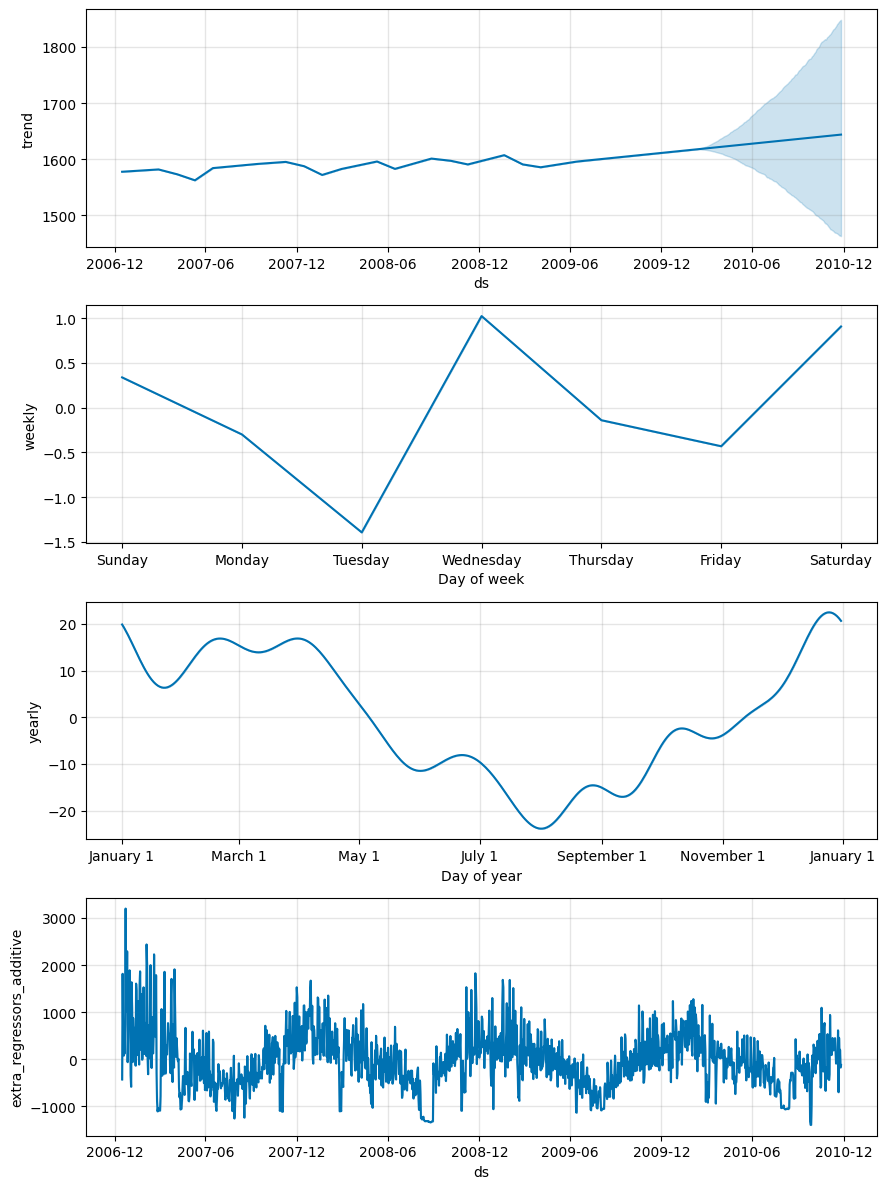

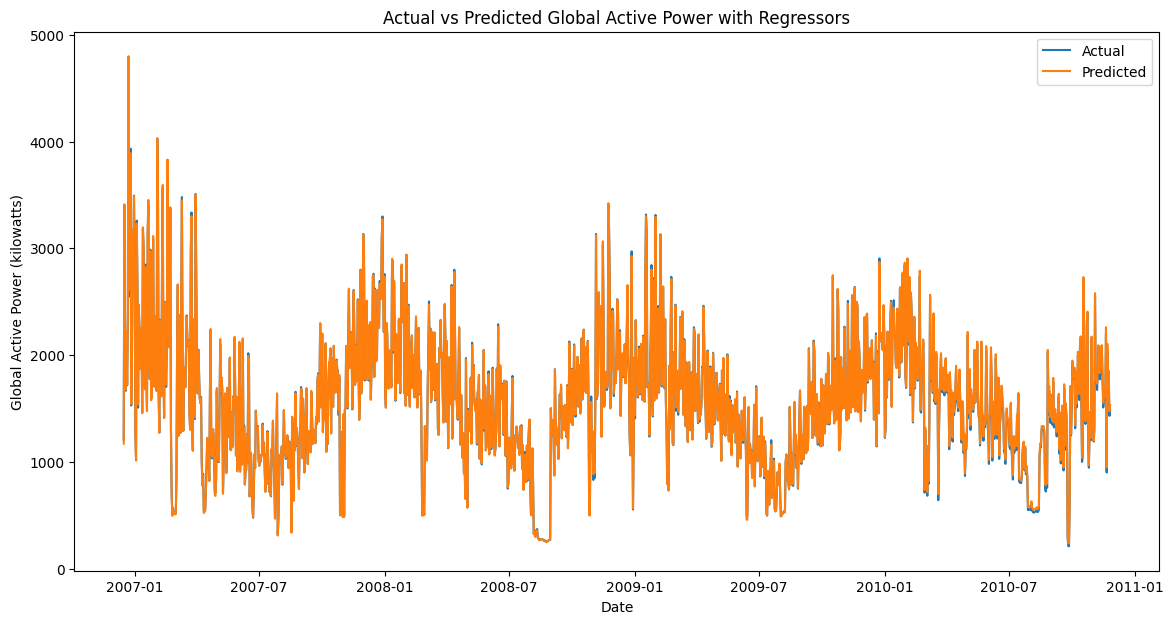

In [69]:
daily_sum_df_2.reset_index(inplace=True)
daily_sum_df_2.rename(columns={'Datetime': 'ds', 'Global_active_power': 'y', 'Global_reactive_power': 'add1', 'Voltage': 'add2', 'Global_intensity': 'add3', 'Sub_metering_1': 'add4', 'Sub_metering_2': 'add5', 'Sub_metering_3': 'add6'}, inplace=True)

x = len(daily_sum_df_2)

train_df = daily_sum_df_2.iloc[:x-300]
test_df = daily_sum_df_2.iloc[x-300:]

model = Prophet()

for regressor in ['add1', 'add2', 'add3', 'add4', 'add5', 'add6']:
    model.add_regressor(regressor)

model.fit(train_df)

future = model.make_future_dataframe(periods=300)

future = future.merge(daily_sum_df[['ds', 'add1', 'add2', 'add3', 'add4', 'add5', 'add6']], on='ds', how='left')

forecast = model.predict(future)

fig = model.plot(forecast)
plt.title('Forecast of Global Active Power with Regressors')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(daily_sum_df['ds'], daily_sum_df['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.title('Actual vs Predicted Global Active Power with Regressors')
plt.legend()
plt.show()

In [70]:
y_true = test_df['y'].values
y_pred = forecast.iloc[-300:]['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

mse = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

mape = mean_absolute_percentage_error(actual_test, predicted_test) * 100

Mean Absolute Error (MAE): 30.906589776272508
Mean Squared Error (MSE): 1144.3998702354143
Root Mean Squared Error (RMSE): 33.82897973979431


In [71]:
mape

69.58527881015311

In [44]:
df = pd.read_csv(file_path, delimiter=';', parse_dates={'Datetime': ['Date', 'Time']}, dayfirst=True, na_values='?', low_memory=False)

df.fillna(method='ffill', inplace=True)

df.set_index('Datetime', inplace=True)

hourly_df = df.resample('H').mean()

print(hourly_df.head())

correlation = hourly_df['Global_active_power'].corr(hourly_df['Voltage'])

                     Global_active_power  Global_reactive_power     Voltage  \
Datetime                                                                      
2006-12-16 17:00:00             4.222889               0.229000  234.643889   
2006-12-16 18:00:00             3.632200               0.080033  234.580167   
2006-12-16 19:00:00             3.400233               0.085233  233.232500   
2006-12-16 20:00:00             3.268567               0.075100  234.071500   
2006-12-16 21:00:00             3.056467               0.076667  237.158667   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:00:00         18.100000             0.0        0.527778   
2006-12-16 18:00:00         15.600000             0.0        6.716667   
2006-12-16 19:00:00         14.503333             0.0        1.433333   
2006-12-16 20:00:00         13.916667             0.0        0.000000   
2006-12-

In [45]:
correlation

-0.37450725485667746

In [46]:
correlation_2 = hourly_df['Voltage'].corr(hourly_df['Global_intensity'])

In [47]:
correlation_2

-0.3880666088134166